In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
# reading the features and the labels
df= pd.read_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\train.csv')

In [4]:
df.head()

user_name    country  \
0            NaN  Australia   
1  @wawinereport         US   
2            NaN      Italy   
3     @vossroger     France   
4     @vossroger     France   

                                        review_title  \
0  Andrew Peace 2007 Peace Family Vineyard Chardo...   
1  North by Northwest 2014 Red (Columbia Valley (...   
2                  Renato Ratti 2007 Conca  (Barolo)   
3  Domaine l'Ancienne Cure 2010 L'Abbaye White (B...   
4  Château du Cèdre 2012 Le Cèdre Vintage Malbec ...   

                                  review_description            designation  \
0  Classic Chardonnay aromas of apple, pear and h...  Peace Family Vineyard   
1  This wine is near equal parts Syrah and Merlot...                    NaN   
2  Barolo Conca opens with inky dark concentratio...                  Conca   
3  It's impressive what a small addition of Sauvi...               L'Abbaye   
4  This ripe, sweet wine is rich and full of drie...       Le Cèdre Vintage   

   points  price          province                 region_1         region_2  \
0      83   10.0   Australia Other  South Eastern Australia              NaN   
1      89   15.0        Washington     Columbia Valley (WA)  Columbia Valley   
2      94   80.0          Piedmont                   Barolo              NaN   
3      87   22.0  Southwest France             Bergerac Sec              NaN   
4      88   33.0      France Other           Vin de Liqueur              NaN   

                    winery                     variety  
0             Andrew Peace                  Chardonnay  
1       North by Northwest                   Red Blend  
2             Renato Ratti                    Nebbiolo  
3  Domaine l'Ancienne Cure  Bordeaux-style White Blend  
4         Château du Cèdre                      Malbec

In [5]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                  5569
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [6]:
df.drop(['user_name','review_title','review_description'],axis=1,inplace=True)

In [7]:
df.head()

country            designation  points  price          province  \
0  Australia  Peace Family Vineyard      83   10.0   Australia Other   
1         US                    NaN      89   15.0        Washington   
2      Italy                  Conca      94   80.0          Piedmont   
3     France               L'Abbaye      87   22.0  Southwest France   
4     France       Le Cèdre Vintage      88   33.0      France Other   

                  region_1         region_2                   winery  \
0  South Eastern Australia              NaN             Andrew Peace   
1     Columbia Valley (WA)  Columbia Valley       North by Northwest   
2                   Barolo              NaN             Renato Ratti   
3             Bergerac Sec              NaN  Domaine l'Ancienne Cure   
4           Vin de Liqueur              NaN         Château du Cèdre   

                      variety  
0                  Chardonnay  
1                   Red Blend  
2                    Nebbiolo  
3  Bordeaux-style White Blend  
4                      Malbec

In [8]:
print(df['variety'].value_counts())

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [9]:
data=df

In [10]:
data['region_2']=data['region_2'].fillna(data['region_2'].mode()[0])
data['price']=data['price'].fillna(data['price'].mean())
data['region_1']=data['region_1'].fillna(data['region_1'].mode()[0])
data['province']=data['province'].fillna(data['province'].mode()[0])
data['designation']=data['designation'].fillna(data['designation'].mode()[0])

In [11]:
df.isnull().sum()

country        35
designation     0
points          0
price           0
province        0
region_1        0
region_2        0
winery          0
variety         0
dtype: int64

In [12]:
data['country']=data['country'].fillna(data['country'].mode()[0])

In [13]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [14]:
data.head()

country            designation  points  price          province  \
0  Australia  Peace Family Vineyard      83   10.0   Australia Other   
1         US                Reserve      89   15.0        Washington   
2      Italy                  Conca      94   80.0          Piedmont   
3     France               L'Abbaye      87   22.0  Southwest France   
4     France       Le Cèdre Vintage      88   33.0      France Other   

                  region_1         region_2                   winery  \
0  South Eastern Australia    Central Coast             Andrew Peace   
1     Columbia Valley (WA)  Columbia Valley       North by Northwest   
2                   Barolo    Central Coast             Renato Ratti   
3             Bergerac Sec    Central Coast  Domaine l'Ancienne Cure   
4           Vin de Liqueur    Central Coast         Château du Cèdre   

                      variety  
0                  Chardonnay  
1                   Red Blend  
2                    Nebbiolo  
3  Bordeaux-style White Blend  
4                      Malbec

In [15]:
def Encode(d):
    for column in data.columns[~data.columns.isin(['points', 'price','variety'])]:
        data[column] = data[column].factorize()[0]
    return data

wine = Encode(data.copy())
wine.head() # looking at the

country  designation  points  price  province  region_1  region_2  winery  \
0        0            0      83   10.0         0         0         0       0   
1        1            1      89   15.0         1         1         1       1   
2        2            2      94   80.0         2         2         0       2   
3        3            3      87   22.0         3         3         0       3   
4        3            4      88   33.0         4         4         0       4   

                      variety  
0                  Chardonnay  
1                   Red Blend  
2                    Nebbiolo  
3  Bordeaux-style White Blend  
4                      Malbec

In [16]:
print(df['variety'].value_counts().sort_values(ascending=False))

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [17]:
asc=[x for x in df.variety.value_counts().sort_values(ascending=False).index]

In [18]:
a=[]
i=0
for i in range(len(asc)): 
    i=i+1
    a.append(i)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [19]:
d={}
for i in range(len(asc)):
    d[asc[i]]=a[i]
print(d)

{'Pinot Noir': 1, 'Chardonnay': 2, 'Cabernet Sauvignon': 3, 'Red Blend': 4, 'Bordeaux-style Red Blend': 5, 'Riesling': 6, 'Sauvignon Blanc': 7, 'Syrah': 8, 'Rosé': 9, 'Merlot': 10, 'Nebbiolo': 11, 'Zinfandel': 12, 'Sangiovese': 13, 'Malbec': 14, 'Portuguese Red': 15, 'White Blend': 16, 'Sparkling Blend': 17, 'Tempranillo': 18, 'Rhône-style Red Blend': 19, 'Pinot Gris': 20, 'Champagne Blend': 21, 'Cabernet Franc': 22, 'Grüner Veltliner': 23, 'Portuguese White': 24, 'Pinot Grigio': 25, 'Bordeaux-style White Blend': 26, 'Gewürztraminer': 27, 'Gamay': 28}


In [20]:
a=[]
for i in df['variety']:
    if i in d:
        a.append(d[i])
print(a)

[2, 4, 11, 26, 14, 3, 4, 12, 1, 4, 7, 2, 28, 23, 4, 5, 4, 2, 11, 13, 3, 11, 1, 11, 5, 5, 14, 2, 5, 2, 4, 8, 3, 13, 2, 1, 3, 5, 7, 8, 16, 4, 8, 13, 22, 15, 24, 19, 9, 8, 13, 21, 8, 2, 3, 1, 10, 2, 3, 11, 7, 15, 1, 13, 3, 12, 6, 12, 14, 4, 11, 3, 19, 5, 2, 10, 15, 2, 1, 1, 7, 14, 17, 25, 12, 7, 14, 26, 15, 11, 4, 15, 1, 3, 5, 3, 1, 3, 4, 2, 8, 1, 18, 2, 2, 4, 2, 7, 4, 3, 9, 28, 16, 1, 3, 17, 1, 8, 7, 3, 2, 2, 2, 6, 3, 26, 1, 21, 3, 10, 2, 20, 17, 17, 13, 12, 18, 1, 14, 20, 11, 17, 4, 1, 3, 3, 7, 9, 5, 1, 20, 6, 4, 3, 2, 1, 7, 3, 10, 17, 8, 5, 13, 11, 11, 3, 2, 11, 2, 5, 28, 8, 3, 11, 19, 11, 21, 7, 23, 1, 10, 8, 4, 18, 16, 4, 18, 1, 6, 7, 7, 1, 4, 28, 22, 15, 2, 1, 6, 9, 17, 22, 2, 5, 19, 7, 9, 4, 2, 9, 14, 4, 4, 1, 14, 3, 2, 15, 3, 28, 4, 2, 16, 5, 3, 1, 8, 10, 9, 2, 4, 1, 5, 11, 14, 2, 1, 2, 4, 1, 11, 15, 5, 3, 1, 3, 3, 1, 2, 4, 3, 4, 8, 5, 6, 4, 17, 6, 21, 7, 2, 4, 16, 8, 1, 10, 26, 3, 3, 24, 3, 5, 5, 13, 3, 3, 1, 3, 10, 8, 3, 5, 15, 4, 14, 4, 14, 2, 1, 5, 2, 1, 10, 8, 3, 18, 1, 2, 4,

In [21]:
pred=pd.DataFrame(a)

In [22]:
wine['variety']=pred

In [23]:
wine.head()

country  designation  points  price  province  region_1  region_2  winery  \
0        0            0      83   10.0         0         0         0       0   
1        1            1      89   15.0         1         1         1       1   
2        2            2      94   80.0         2         2         0       2   
3        3            3      87   22.0         3         3         0       3   
4        3            4      88   33.0         4         4         0       4   

   variety  
0        2  
1        4  
2       11  
3       26  
4       14

In [25]:
wine.to_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\filized_trainlabeldata.csv')

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'winery', 'variety'],
      dtype='object')

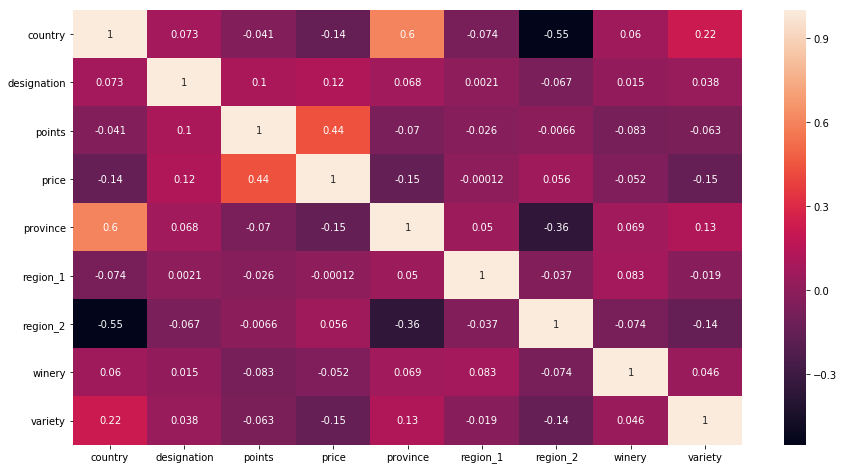

In [26]:
import matplotlib.pyplot as plt
corr = wine.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
wine.columns

In [27]:
x_train=wine.drop(['variety'],axis=1) 
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate  
train_y=wine['variety']

In [29]:
model = XGBClassifier()

In [30]:
model.fit(x_train, train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [31]:
# cheking training accuracy
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.7424416564840244

#STANDARD SCALAR

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_x=scaler.fit_transform(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [33]:
scalar_model = XGBClassifier()
scalar_model.fit(train_x, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [34]:
# cheking training accuracy
y_pred = scalar_model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.7424416564840244

GRID SEARCH

In [37]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid={
   
    ' learning_rate':[0.3,0.35],
    'max_depth': [5,6,7],
    'n_estimators':[100,150,200]
    
}

In [45]:
grid= GridSearchCV(XGBClassifier(),param_grid, verbose=3)

In [46]:
grid.fit(train_x,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]   learning_rate=0.3, max_depth=5, n_estimators=100, score=0.589232044771479, total=  28.3s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s remaining:    0.0s


[CV]   learning_rate=0.3, max_depth=5, n_estimators=100, score=0.5900746733042938, total=  28.3s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   59.7s remaining:    0.0s


[CV]   learning_rate=0.3, max_depth=5, n_estimators=100, score=0.5901851947917207, total=  29.2s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=150 ...............
[CV]   learning_rate=0.3, max_depth=5, n_estimators=150, score=0.5988703492589905, total=  45.7s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=150 ...............
[CV]   learning_rate=0.3, max_depth=5, n_estimators=150, score=0.6002385397220493, total=  53.4s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=150 ...............
[CV]   learning_rate=0.3, max_depth=5, n_estimators=150, score=0.6021165119053795, total=  46.6s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.3, max_depth=5, n_estimators=200, score=0.6050886102186755, total=  53.6s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.3, max_depth=5, n_estimators=200, score=0.6055278987761875, total=  54.2s
[CV]  learning_rate=0.3, max_depth=5, n_estimators=200 ........

[CV]   learning_rate=0.35, max_depth=7, n_estimators=200, score=0.6147787335475179, total= 1.2min
[CV]  learning_rate=0.35, max_depth=7, n_estimators=200 ..............
[CV]   learning_rate=0.35, max_depth=7, n_estimators=200, score=0.6197365691765194, total= 1.2min
[CV]  learning_rate=0.35, max_depth=7, n_estimators=200 ..............
[CV]   learning_rate=0.35, max_depth=7, n_estimators=200, score=0.6208434922446439, total= 1.2min


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 46.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=False, verbosity=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={' learning_rate': [0.3, 0.35], 'max_depth': [5, 6, 7], 'n_estimators': [100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [47]:
grid.best_params_

{' learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}

In [35]:
new_model=XGBClassifier(learning_rate= 0.35, max_depth= 10, n_estimators= 300)
new_model.fit(train_x, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.35, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=300, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [36]:
# cheking training accuracy
y_pred = new_model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.9828447681382098

Above model is overfitted

In [28]:
scalar_model = XGBClassifier(learning_rate=0.3,max_depth=7,n_estimators=150)
scalar_model.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.3, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=150, n_jobs=0, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [29]:
# cheking training accuracy
y_pred = scalar_model.predict(train_x)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(train_y,predictions)
accuracy

0.8528981211512636

In [30]:
filename_scaler = r'D:\ML course practise\intern\Knight ML final\new_model.pickle'
pickle.dump(scalar_model, open(filename_scaler, 'wb'))
new_model_p = pickle.load(open(filename_scaler, 'rb'))

In [31]:
test_df=pd.read_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\filized_testdata.csv')

In [32]:
test_df.head()

Unnamed: 0  country  designation  points  price  province  region_1  \
0           0        0            0      88   35.0         0         0   
1           1        1            1      90   60.0         1         1   
2           2        0            2      87   38.0         2         2   
3           3        1            3      91   20.0         1         1   
4           4        2            2      90   49.0         3         3   

   region_2  winery  
0         0       0  
1         1       1  
2         2       2  
3         1       3  
4         1       4

In [33]:
test_df.drop(['Unnamed: 0'],axis=1,inplace=True)
test_df.head()

country  designation  points  price  province  region_1  region_2  winery
0        0            0      88   35.0         0         0         0       0
1        1            1      90   60.0         1         1         1       1
2        0            2      87   38.0         2         2         2       2
3        1            3      91   20.0         1         1         1       3
4        2            2      90   49.0         3         3         1       4

In [34]:
test_df.isnull().sum()

country        0
designation    0
points         0
price          0
province       0
region_1       0
region_2       0
winery         0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_test=scaler.fit_transform(test_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
y_pred=scalar_model.predict(x_test)

In [40]:
y_pred

array([ 3, 11,  3, ...,  3, 10,  8], dtype=int64)

In [41]:
asc

['Pinot Noir',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Red Blend',
 'Bordeaux-style Red Blend',
 'Riesling',
 'Sauvignon Blanc',
 'Syrah',
 'Rosé',
 'Merlot',
 'Nebbiolo',
 'Zinfandel',
 'Sangiovese',
 'Malbec',
 'Portuguese Red',
 'White Blend',
 'Sparkling Blend',
 'Tempranillo',
 'Rhône-style Red Blend',
 'Pinot Gris',
 'Champagne Blend',
 'Cabernet Franc',
 'Grüner Veltliner',
 'Portuguese White',
 'Pinot Grigio',
 'Bordeaux-style White Blend',
 'Gewürztraminer',
 'Gamay']

In [42]:
a=[]
i=0
for i in range(len(asc)): 
    i=i+1
    a.append(i)
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [43]:
b=[]
for i in y_pred:
    c=asc[a.index(i)]
    b.append(c)
print(b)

['Cabernet Sauvignon', 'Nebbiolo', 'Cabernet Sauvignon', 'Nebbiolo', 'Red Blend', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Syrah', 'Riesling', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Gamay', 'Pinot Noir', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Syrah', 'Syrah', 'Chardonnay', 'Bordeaux-style Red Blend', 'Pinot Gris', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Portuguese Red', 'Chardonnay', 'Chardonnay', 'Cabernet Sauvignon', 'Bordeaux-style Red Blend', 'Pinot Gris', 'Chardonnay', 'Syrah', 'Pinot Noir', 'Pinot Noir', 'Cabernet Sauvignon', 'Portuguese Red', 'Riesling', 'Red Blend', 'Bordeaux-style Red Blend', 'Chardonnay', 'Riesling', 'Chardonnay', 'Red Blend', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Riesling', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Portuguese Red', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Cabernet Sauvignon', 'Chardonnay', 'Chardonnay', 'Portuguese Red', 'Cabernet Sauvig

In [44]:
# reading the features and the labels
df= pd.read_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\test.csv')

In [45]:
df['variety']=pd.DataFrame(b)

In [46]:
df.head()

user_name    country                                       review_title  \
0   @paulgwine          US  Boedecker Cellars 2011 Athena Pinot Noir (Will...   
1   @wineschach  Argentina  Mendoza Vineyards 2012 Gran Reserva by Richard...   
2       @vboone         US                Prime 2013 Chardonnay (Coombsville)   
3   @wineschach  Argentina  Bodega Cuarto Dominio 2012 Chento Vineyard Sel...   
4  @kerinokeefe      Italy           SassodiSole 2012  Brunello di Montalcino   

                                  review_description  \
0  Nicely differentiated from the companion Stewa...   
1  Charred, smoky, herbal aromas of blackberry tr...   
2  Slightly sour and funky in earth, this is a re...   
3  This concentrated, midnight-black Malbec deliv...   
4  Earthy aromas suggesting grilled porcini, leat...   

                      designation  points  price          province  \
0                          Athena      88   35.0            Oregon   
1  Gran Reserva by Richard Bonvin      90   60.0  Mendoza Province   
2                             NaN      87   38.0        California   
3       Chento Vineyard Selection      91   20.0  Mendoza Province   
4                             NaN      90   49.0           Tuscany   

                 region_1           region_2                 winery  \
0       Willamette Valley  Willamette Valley      Boedecker Cellars   
1                 Mendoza                NaN      Mendoza Vineyards   
2             Coombsville               Napa                  Prime   
3                 Mendoza                NaN  Bodega Cuarto Dominio   
4  Brunello di Montalcino                NaN            SassodiSole   

              variety  
0  Cabernet Sauvignon  
1            Nebbiolo  
2  Cabernet Sauvignon  
3            Nebbiolo  
4           Red Blend

In [47]:
df.to_csv(r'D:\ML course practise\intern\Knight ML final\submission.csv')